In [4]:
import os
import itertools
import glob
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import openpyxl
import matplotlib.ticker
import matplotlib.pyplot as plt


sns.set(font_scale=1.2, style='whitegrid', font='CMU Sans Serif')

# # drawio colors
# # 189,215,238
# # 255,230,153
# pal = sns.color_palette(['#BDD7EE', '#FFE699'])
sns.set_palette("muted", 9)

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['figure.figsize'] = (4.5,2)
mpl.rcParams['figure.dpi'] = 100

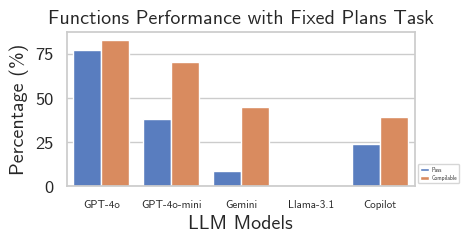

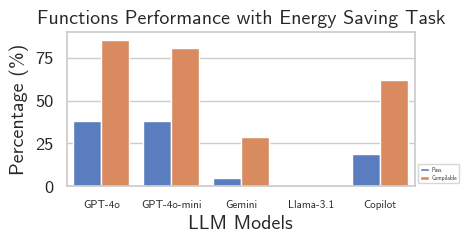

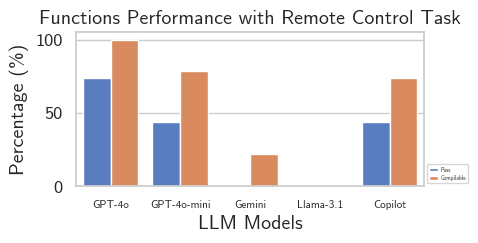

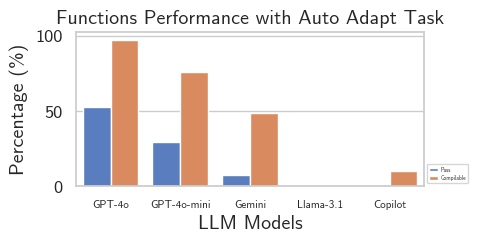

In [7]:
tasks = final_df_en['Task'].unique()

# plot for each task
for task in tasks:
    task_df = final_df_en[final_df_en['Task'] == task]

    # g = sns.lineplot(data=task_df, x='Model', y='Rate', hue='Type', markers=True, style='Type')
    # annotation for lineplot
    # for line in g.lines:
    #     for x, y in zip(line.get_xdata(), line.get_ydata()):
    #         g.annotate(f'{y:.1f}',
    #                    xy=(x, y),
    #                    xytext=(6, 0),
    #                    textcoords='offset points',
    #                    ha='center',
    #                    va='bottom',
    #                    fontsize=5,
    #                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.5, boxstyle='round,pad=0.1')
    #                    )
    #


    g = sns.barplot(data=task_df, x='Model', y='Rate', hue='Type')
    # # annotation for barplot
    # for p in g.patches:
    #     height = p.get_height()
    #     if height != 0 or (height == 0 and isinstance(height, float)):
    #         g.annotate(f'{height:.1f}%',
    #                     (p.get_x() + p.get_width() / 2., height),
    #                     ha='center', va='bottom',
    #                     xytext=(0, 0),
    #                     textcoords='offset points',
    #                     fontsize=5)




    # legend format
    handles, labels = g.get_legend_handles_labels()

    if handles and labels:
        legend = plt.legend(
            handles=handles,
            labels=labels,
            loc='lower left',
            bbox_to_anchor=(1,0),
            fontsize=4,          # Adjust font size
            handlelength=1.5,          # Adjust length of legend handles
            handletextpad=0.5,         # Space between handle and text
            borderpad=0.4,             # Padding between legend border and content
            borderaxespad=0.5,         # Padding between legend border and axes
            title=None,      # Add a title if needed
            title_fontsize='medium',    # Font size of the title
            ncol = 1,
            frameon = True,
        )
        for text in legend.get_texts():
            if text.get_text() == 'PASS RATE':
                text.set_text('Pass')
            elif text.get_text() == 'COMPILABLE RATE':
                text.set_text('Compilable')

    g.set_title(f"Functions Performance with {task} Task")
    g.set_xlabel('LLM Models')
    g.set_ylabel('Percentage (%)')

    # x-label font size
    plt.xticks(fontsize=8)  # Rotate labels 45 degrees


    # plt.savefig(f"{task.lower().replace(' ', '_')}_lineplot.pdf", bbox_inches='tight')
    # plt.savefig(f"{task.lower().replace(' ', '_')}_barplot.pdf", bbox_inches='tight')
    # plt.savefig(f"{task.lower().replace(' ', '_')}_lineplot_with_value.pdf", bbox_inches='tight')
    # plt.savefig(f"{task.lower().replace(' ', '_')}_barplot_with_value.pdf", bbox_inches='tight')

    plt.show()


webf NOT subset; don't know how to subset; dropped


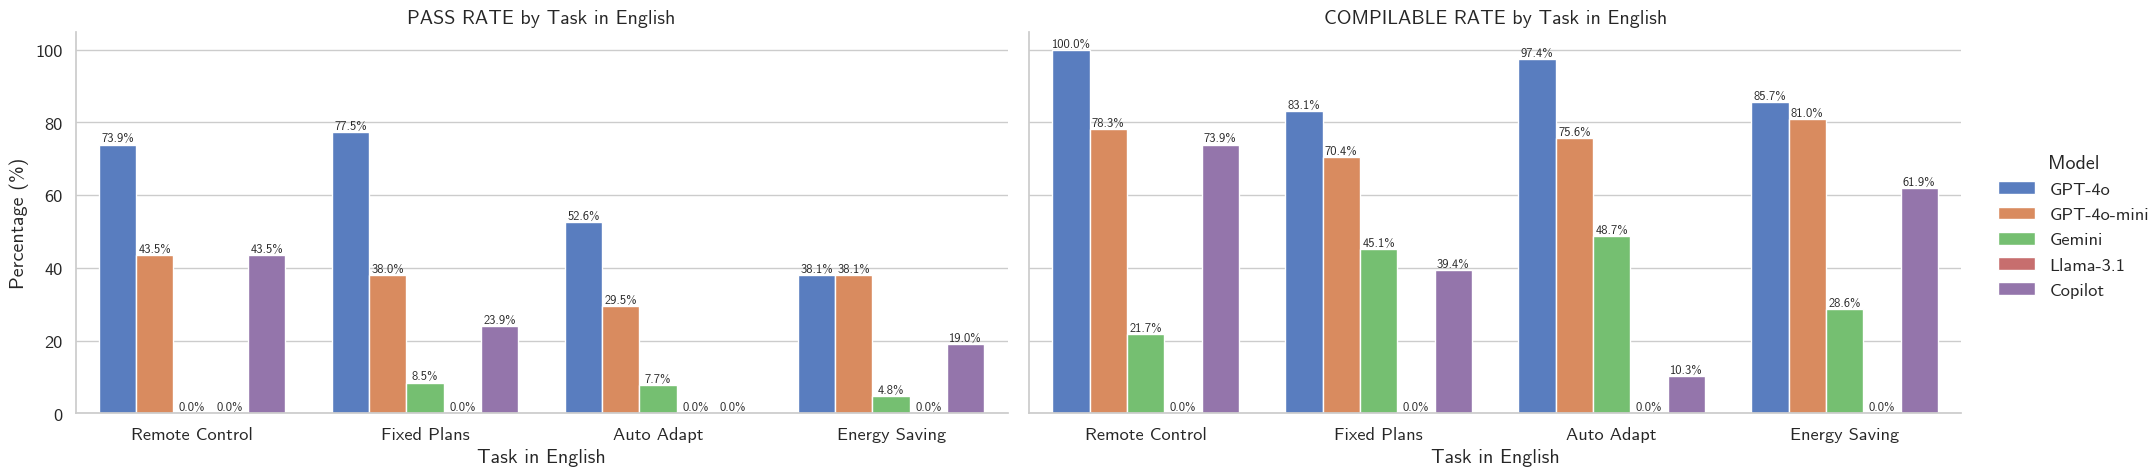

In [10]:
task_order = ["Remote Control", 'Fixed Plans', "Auto Adapt", "Energy Saving"]

final_df_en['Task'] = pd.Categorical(final_df_en['Task'], categories=task_order, ordered=True)
# print(final_df['Task'])

g = sns.catplot(
    data=final_df_en,
    x='Task',
    y='Rate',
    hue='Model',
    col='Type',
    kind='bar',
    height=5,
    aspect=2
)

g.set_axis_labels("Task in English", "Percentage (%)")
g.set_titles("{col_name} by Task in English")
g._legend.set_bbox_to_anchor((1, 0.5))

# comment this for loop if you don't want to annotate the bars
for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()

        # Only annotate if the height is not exactly 0 (but allow 0.0)
        if height != 0 or (height == 0 and isinstance(height, float)):
            ax.annotate(f'{height:.1f}%',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom',
                        xytext=(0, 0),
                        textcoords='offset points',
                        fontsize=9,)
plt.savefig("all_tasks_barplot_with_values_en.pdf", bbox_inches='tight')

# plt.savefig("all_tasks_barplot_en.pdf", bbox_inches='tight')

